<a href="https://colab.research.google.com/github/meMatheshKannan/CodSoftTasks/blob/main/SPAM_SMS_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt


In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/soaicbe/ml/master/spam.csv")
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Category'] = encoder.fit_transform(data['Category'])


In [4]:
X_train,X_test, y_train,y_test = train_test_split(data['Message'], data['Category'], test_size=0.2)

In [5]:
X_test

1893    CALL 09090900040 & LISTEN TO EXTREME DIRTY LIV...
4444    You know my old Dom I told you about yesterday...
4788                         Ü thk of wat to eat tonight.
1963    it to 80488. Your 500 free text messages are v...
4189    Mm umma ask vava also to come tell him can pla...
                              ...                        
223                                Sorry, I'll call later
2921    Thanx 4 the time weve spent 2geva, its bin mi...
1188    There's no point hangin on to mr not right if ...
1370                     Did you try making another butt.
3622    That means from february to april i'll be gett...
Name: Message, Length: 1115, dtype: object

In [6]:
model = Sequential()
model.add(Input(shape=(1,), dtype="string"))

In [7]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

max_tokens = 100
max_len = 10
vectorize_layer = TextVectorization(
  max_tokens=max_tokens,
  output_mode="int",
  output_sequence_length=max_len,
)

In [8]:
vectorize_layer.adapt(X_train)

In [9]:
reverse_word_index = vectorize_layer.get_vocabulary()
reverse_word_index

['',
 '[UNK]',
 'i',
 'to',
 'you',
 'a',
 'the',
 'u',
 'and',
 'is',
 'in',
 'me',
 'my',
 'for',
 'your',
 'it',
 'of',
 'have',
 'call',
 'on',
 'that',
 'are',
 '2',
 'now',
 'im',
 'so',
 'not',
 'but',
 'do',
 'or',
 'at',
 'ur',
 'can',
 'with',
 'if',
 'get',
 'will',
 'be',
 'just',
 'no',
 'we',
 'this',
 'its',
 'up',
 '4',
 'ltgt',
 'dont',
 'from',
 'go',
 'when',
 'what',
 'out',
 'ok',
 'free',
 'all',
 'how',
 'know',
 'got',
 'ill',
 'am',
 'like',
 'was',
 'good',
 'then',
 'come',
 'time',
 'love',
 'only',
 'day',
 'there',
 'want',
 'send',
 'by',
 'text',
 'as',
 'about',
 'one',
 'going',
 'txt',
 'he',
 'lor',
 'sorry',
 'need',
 'home',
 'stop',
 'back',
 'still',
 'see',
 'r',
 'n',
 'our',
 'her',
 'she',
 'today',
 'da',
 'later',
 'cant',
 'tell',
 'well',
 'reply']

In [10]:
vectorize_layer.get_weights()

[array([b'i', b'to', b'you', b'a', b'the', b'u', b'and', b'is', b'in',
        b'me', b'my', b'for', b'your', b'it', b'of', b'have', b'call',
        b'on', b'that', b'are', b'2', b'now', b'im', b'so', b'not', b'but',
        b'do', b'or', b'at', b'ur', b'can', b'with', b'if', b'get',
        b'will', b'be', b'just', b'no', b'we', b'this', b'its', b'up',
        b'4', b'ltgt', b'dont', b'from', b'go', b'when', b'what', b'out',
        b'ok', b'free', b'all', b'how', b'know', b'got', b'ill', b'am',
        b'like', b'was', b'good', b'then', b'come', b'time', b'love',
        b'only', b'day', b'there', b'want', b'send', b'by', b'text', b'as',
        b'about', b'one', b'going', b'txt', b'he', b'lor', b'sorry',
        b'need', b'home', b'stop', b'back', b'still', b'see', b'r', b'n',
        b'our', b'her', b'she', b'today', b'da', b'later', b'cant',
        b'tell', b'well', b'reply'], dtype=object)]

In [11]:
model.add(vectorize_layer)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 10)                0         
 ctorization)                                                    
                                                                 
Total params: 0 (0.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
from tensorflow.keras.layers import Embedding
model.add(Embedding(max_tokens + 1, 8))

In [14]:
from tensorflow.keras.layers import LSTM, SimpleRNN
model.add(LSTM(16))


In [15]:
from tensorflow.keras.layers import Dense

model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 10)                0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 10, 8)             808       
                                                                 
 lstm (LSTM)                 (None, 16)                1600      
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2697 (10.54 KB)
Trainable params: 2697 (10.54 KB)
Non-trainable params: 0 (0.00 Byte)
______________________

In [17]:
model.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['accuracy'],
)

In [18]:
history = model.fit(X_train, y_train, epochs=100)


Epoch 1/100
140/140 [==============================] - 13s 55ms/step - loss: 0.4229 - accuracy: 0.8672
Epoch 2/100
140/140 [==============================] - 3s 21ms/step - loss: 0.2209 - accuracy: 0.9143
Epoch 3/100
140/140 [==============================] - 2s 16ms/step - loss: 0.1829 - accuracy: 0.9345
Epoch 4/100
140/140 [==============================] - 2s 17ms/step - loss: 0.1774 - accuracy: 0.9336
Epoch 5/100
140/140 [==============================] - 4s 29ms/step - loss: 0.1731 - accuracy: 0.9356
Epoch 6/100
140/140 [==============================] - 3s 19ms/step - loss: 0.1691 - accuracy: 0.9385
Epoch 7/100
140/140 [==============================] - 3s 18ms/step - loss: 0.1684 - accuracy: 0.9387
Epoch 8/100
140/140 [==============================] - 2s 12ms/step - loss: 0.1678 - accuracy: 0.9399
Epoch 9/100
140/140 [==============================] - 1s 9ms/step - loss: 0.1657 - accuracy: 0.9408
Epoch 10/100
140/140 [==============================] - 1s 7ms/step - loss: 0.1644

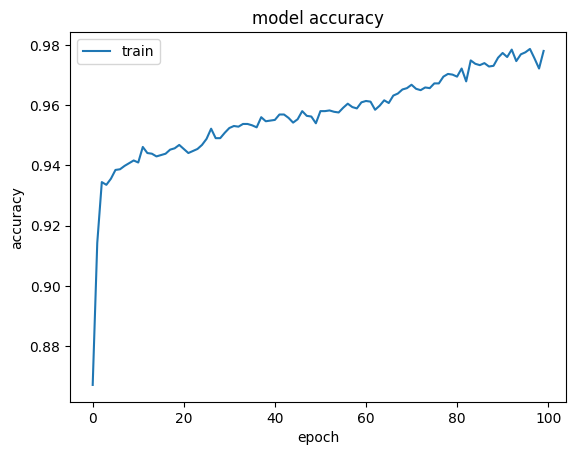

In [19]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

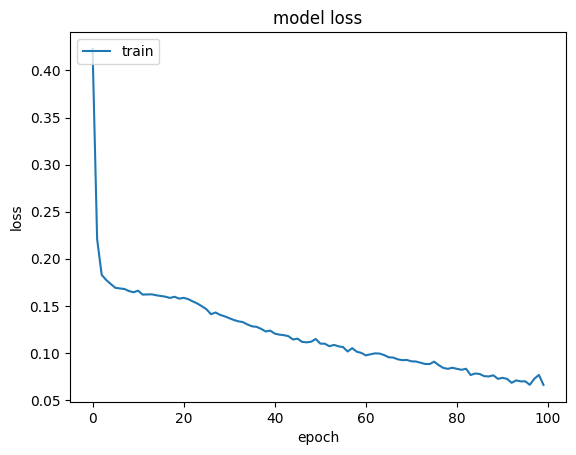

In [20]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
print(model.predict([
  "Free entry in 2 a wkly comp to win FA Cup fina...",
]))

1/1 [==============================] - 0s 469ms/step
[[0.972114]]


In [22]:
print(model.predict([
  "Where are you Dear",
]))

1/1 [==============================] - 0s 42ms/step
[[0.02531264]]


In [23]:
e = model.layers[1]
weights = e.get_weights()[0]
print(weights.shape)

(101, 8)


In [24]:
import io
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, max_tokens):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [25]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
words = np.loadtxt('meta.tsv', skiprows=1, dtype=str)
words

array(['i', 'to', 'you', 'a', 'the', 'u', 'and', 'is', 'in', 'me', 'my',
       'for', 'your', 'it', 'of', 'have', 'call', 'on', 'that', 'are',
       '2', 'now', 'im', 'so', 'not', 'but', 'do', 'or', 'at', 'ur',
       'can', 'with', 'if', 'get', 'will', 'be', 'just', 'no', 'we',
       'this', 'its', 'up', '4', 'ltgt', 'dont', 'from', 'go', 'when',
       'what', 'out', 'ok', 'free', 'all', 'how', 'know', 'got', 'ill',
       'am', 'like', 'was', 'good', 'then', 'come', 'time', 'love',
       'only', 'day', 'there', 'want', 'send', 'by', 'text', 'as',
       'about', 'one', 'going', 'txt', 'he', 'lor', 'sorry', 'need',
       'home', 'stop', 'back', 'still', 'see', 'r', 'n', 'our', 'her',
       'she', 'today', 'da', 'later', 'cant', 'tell', 'well', 'reply'],
      dtype='<U5')

In [27]:
vectors = np.loadtxt('vecs.tsv', skiprows=1)
vectors

array([[-0.07338891, -0.5247216 ,  0.3466442 , -0.22581638,  0.39775375,
        -0.02600869, -0.40140787, -0.260649  ],
       [ 0.1626289 ,  0.02567359, -0.03183151,  0.22793092, -0.08817603,
        -0.13666975, -0.09342185, -0.04792285],
       [ 0.16565524, -0.13661411,  0.04929079,  0.03124968,  0.04438136,
        -0.07366543, -0.1079632 , -0.2830986 ],
       [ 0.1899549 ,  0.04931942, -0.02151966, -0.03177812, -0.02986191,
         0.10301071,  0.1118779 ,  0.03811108],
       [-0.03562853, -0.02513792,  0.03008082, -0.18517865, -0.0247293 ,
        -0.08000802, -0.11436993,  0.05662862],
       [ 0.035071  ,  0.00670596, -0.0149805 , -0.02633101,  0.0684337 ,
         0.05030052,  0.0519705 , -0.16427787],
       [-0.14738762, -0.11421755,  0.08810973,  0.19301209,  0.05380245,
        -0.18494566, -0.23015802, -0.08245312],
       [ 0.07864546,  0.05008638,  0.04214116, -0.13504177,  0.2243868 ,
         0.14778714,  0.11965527, -0.02031803],
       [ 0.00972579, -0.21582766

In [28]:
import plotly.express as px

fig = px.scatter(x=vectors[:,0], y=vectors[:,1], labels={'x':'x', 'y':'y'}, hover_name=words)
fig.show()

In [29]:
model2 = Sequential()
model2.add(Input(shape=(1,), dtype="string"))
model2.add(vectorize_layer)
model2.add(Embedding(max_tokens + 1, 2))
model2.add(SimpleRNN(16, return_sequences=True))
model2.add(SimpleRNN(16))
model2.add(Dense(16, activation="relu"))
model2.add(Dense(1, activation="sigmoid"))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 10)                0         
 ctorization)                                                    
                                                                 
 embedding_1 (Embedding)     (None, 10, 2)             202       
                                                                 
 simple_rnn (SimpleRNN)      (None, 10, 16)            304       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                      

In [30]:
model2.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['accuracy'],
)

In [31]:
history = model2.fit(X_train, y_train, epochs=10)


Epoch 1/10
140/140 [==============================] - 10s 50ms/step - loss: 0.4030 - accuracy: 0.8562
Epoch 2/10
140/140 [==============================] - 4s 26ms/step - loss: 0.2202 - accuracy: 0.9159
Epoch 3/10
140/140 [==============================] - 4s 32ms/step - loss: 0.1892 - accuracy: 0.9295
Epoch 4/10
140/140 [==============================] - 4s 31ms/step - loss: 0.1826 - accuracy: 0.9302
Epoch 5/10
140/140 [==============================] - 3s 25ms/step - loss: 0.1751 - accuracy: 0.9358
Epoch 6/10
140/140 [==============================] - 4s 31ms/step - loss: 0.1706 - accuracy: 0.9376
Epoch 7/10
140/140 [==============================] - 3s 25ms/step - loss: 0.1675 - accuracy: 0.9381
Epoch 8/10
140/140 [==============================] - 3s 25ms/step - loss: 0.1669 - accuracy: 0.9412
Epoch 9/10
140/140 [==============================] - 3s 24ms/step - loss: 0.1676 - accuracy: 0.9372
Epoch 10/10
140/140 [==============================] - 4s 31ms/step - loss: 0.1637 - accur

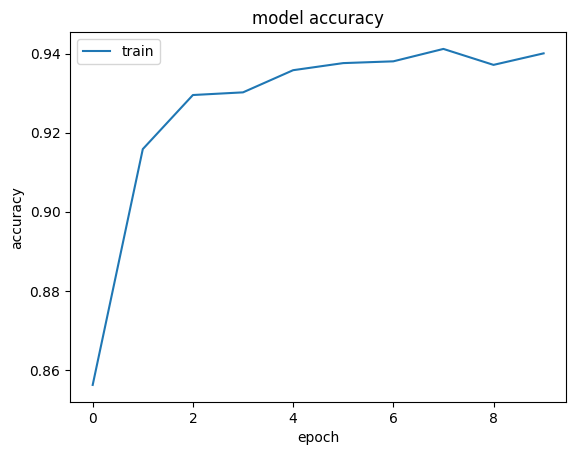

In [32]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()